In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

### Loading the Dataset

In [68]:
# Load the datasets
reddata = pd.read_csv(r"C:\Users\sa200\Downloads\winequality-red.csv", sep=';') #red wine
whitedata = pd.read_csv(r"C:\Users\sa200\Downloads\winequality-white.csv", sep=';') #white wine 

### Checking and removing missing values and Outliers 

In [69]:
# checking for null value from red wine data frame
reddata.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [70]:
# checking for null value from white wine data frame
whitedata.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

##### As there are no null values we move on to the outliers

In [71]:
import numpy as np

# Define a function to detect and remove outliers using the Z-score method
def remove_outliers_zscore(data, threshold=3):
    z_scores = np.abs((data - data.mean()) / data.std())
    filtered_data = data[(z_scores < threshold).all(axis=1)]
    return filtered_data

# Specify the columns where you want to identify and remove outliers
columns_to_check = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']

# Apply outlier removal to selected columns
reddata = reddata.copy()
for col in columns_to_check:
    reddata = remove_outliers_zscore(reddata, threshold=3)

# Display the rows that were removed (outliers)
outliers = reddata[~reddata.index.isin(reddata.index)]
print("Removed Outliers:")
print(outliers)

# Save the cleaned dataset to a new file
reddata.to_csv('reddata.csv', index=False)

# Now, 'reddata' contains your dataset with outliers removed.


Removed Outliers:
Empty DataFrame
Columns: [fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, quality]
Index: []


##### No outliers in the red wine dataset

In [72]:
#for white wine dataset

# Apply outlier removal to selected columns
whitedata = whitedata.copy()
for col in columns_to_check:
    whitedata = remove_outliers_zscore(whitedata, threshold=3)

# Display the rows that were removed (outliers)
outliers = whitedata[~whitedata.index.isin(reddata.index)]
print("Removed Outliers:")
print(outliers)

# Save the cleaned dataset to a new file
whitedata.to_csv('whitedata.csv', index=False)

# Now, 'whitedata' contains your dataset with outliers removed.

Removed Outliers:
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
9               8.1              0.22         0.43             1.5      0.044   
11              8.6              0.23         0.40             4.2      0.035   
13              6.6              0.16         0.40             1.5      0.044   
15              6.6              0.17         0.38             1.5      0.032   
18              7.4              0.34         0.42             1.1      0.033   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      fre

##### Outliers in the white wine dataset removed now we can move on to EDA

### Exploratory Data Analysis

In [73]:
reddata.describe() #statistical description of the data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000
mean,8.213561,0.523016,0.249975,2.176206,0.078722,14.822795,41.212146,0.996606,3.325250,0.633261,10.373447,5.633111
std,1.566832,0.164402,0.185548,0.427392,0.015024,8.766432,25.064893,0.001638,0.138119,0.116411,0.962461,0.719192
min,5.100000,0.120000,0.000000,1.200000,0.038000,1.000000,6.000000,0.991910,2.920000,0.330000,8.700000,4.000000
25%,7.100000,0.390000,0.080000,1.900000,0.069000,8.000000,22.000000,0.995520,3.230000,0.550000,9.500000,5.000000
50%,7.800000,0.520000,0.240000,2.100000,0.078000,13.000000,35.000000,0.996600,3.330000,0.610000,10.100000,6.000000
75%,9.100000,0.630000,0.400000,2.475000,0.087000,20.000000,55.000000,0.997600,3.410000,0.700000,11.000000,6.000000
max,12.900000,1.010000,0.740000,3.450000,0.123000,41.000000,116.000000,1.001000,3.720000,0.980000,13.000000,7.000000


In [74]:
whitedata.describe() #statistical description of the data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000
mean,6.831090,0.264654,0.325124,6.361027,0.042248,34.737701,137.134389,0.993888,3.188901,0.484317,10.577821,5.943844
std,0.763579,0.077518,0.089373,4.931328,0.009975,15.079365,41.167102,0.002892,0.142104,0.103451,1.212237,0.843327
min,4.700000,0.080000,0.060000,0.600000,0.014000,2.000000,21.000000,0.987110,2.790000,0.220000,8.400000,4.000000
25%,6.300000,0.210000,0.270000,1.700000,0.035000,24.000000,107.000000,0.991600,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.310000,5.200000,0.042000,34.000000,133.000000,0.993600,3.180000,0.470000,10.500000,6.000000
75%,7.300000,0.310000,0.370000,9.700000,0.049000,45.000000,166.000000,0.995900,3.280000,0.540000,11.400000,6.000000
max,9.100000,0.495000,0.590000,20.800000,0.072000,79.500000,259.000000,1.001960,3.610000,0.790000,14.200000,8.000000


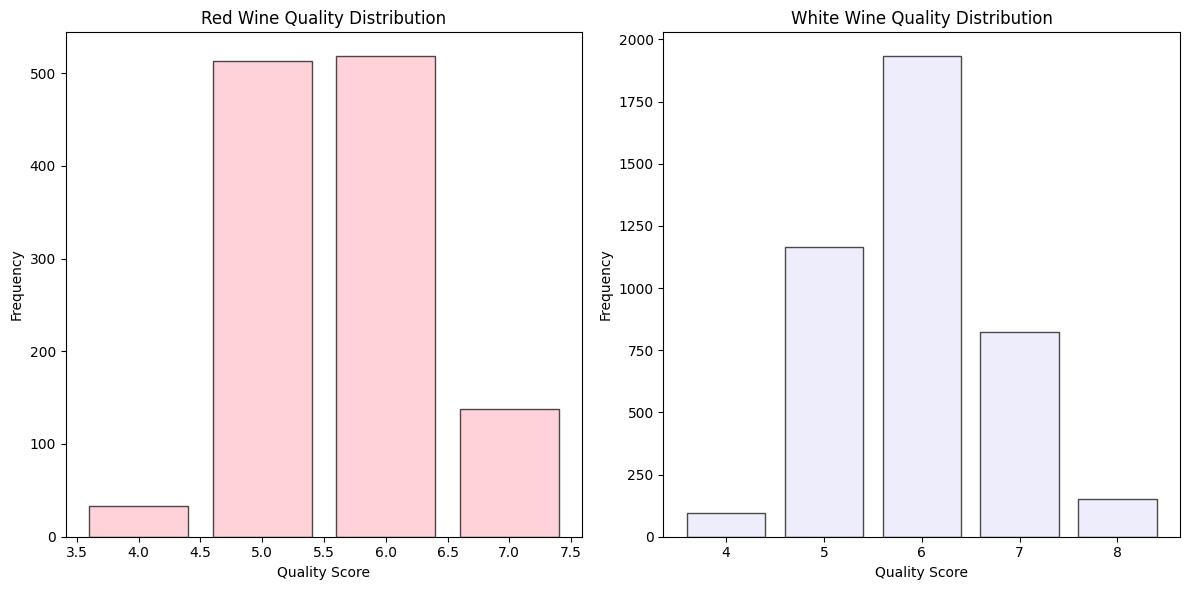

In [75]:
import matplotlib.pyplot as plt

# For red wine dataset
red_wine_quality_counts = reddata['quality'].value_counts().sort_index()
red_wine_quality_scores = red_wine_quality_counts.index

# For white wine dataset
white_wine_quality_counts = whitedata['quality'].value_counts().sort_index()
white_wine_quality_scores = white_wine_quality_counts.index

# Create separate bar plots for red and white wine quality scores and their frequencies
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # Subplot for red wine
plt.bar(red_wine_quality_scores, red_wine_quality_counts, color='pink', edgecolor='black', alpha=0.7)
plt.title('Red Wine Quality Distribution')
plt.xlabel('Quality Score')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)  # Subplot for white wine
plt.bar(white_wine_quality_scores, white_wine_quality_counts, color='lavender', edgecolor='black', alpha=0.7)
plt.title('White Wine Quality Distribution')
plt.xlabel('Quality Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


##### It can be observed that maximum red wine samples have a quality score of 6 with 5 following close behind and the least number of wines have a quality score of 4. While in the white wine samples maximum have a quality score of 6 and least have a quality score of 4 and then 8.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


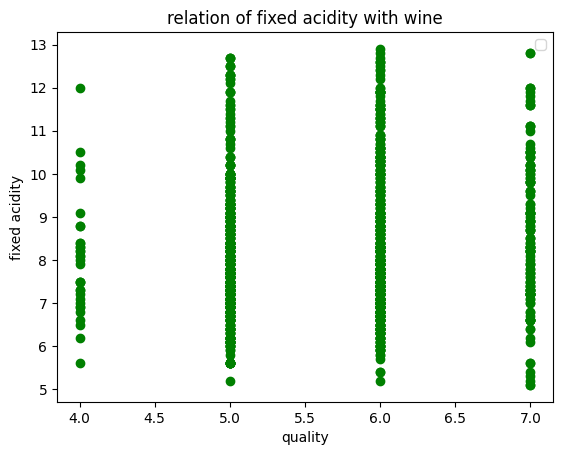

In [76]:
# checking the variation of fixed acidity in the different qualities of wine

plt.scatter(reddata['quality'], reddata['fixed acidity'], color = 'green')
plt.title('relation of fixed acidity with wine')
plt.xlabel('quality')
plt.ylabel('fixed acidity')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


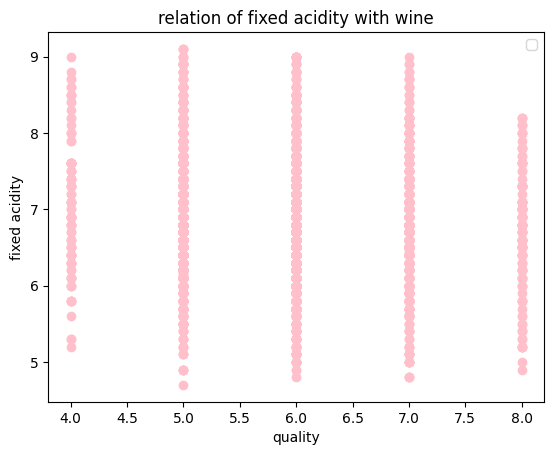

In [77]:
# checking the variation of fixed acidity in the different qualities of wine

plt.scatter(whitedata['quality'], whitedata['fixed acidity'], color = 'pink')
plt.title('relation of fixed acidity with wine')
plt.xlabel('quality')
plt.ylabel('fixed acidity')
plt.legend()
plt.show()

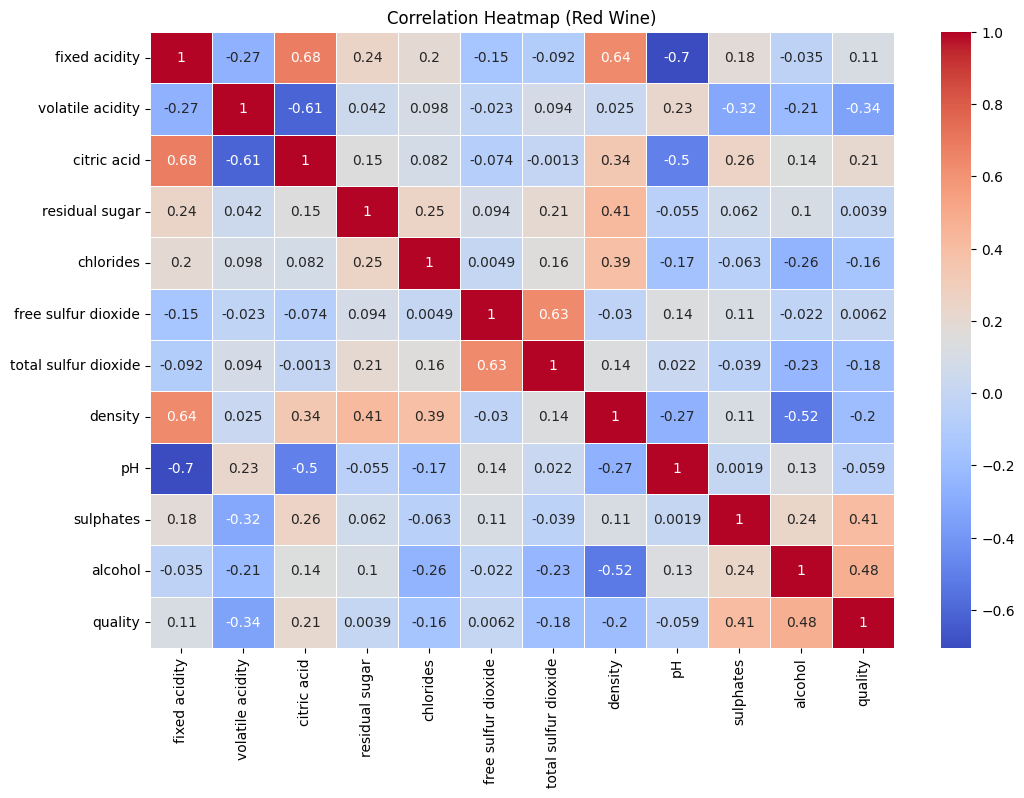

In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix for the red wine data frame
red_wine_corr = reddata.corr()

# Create a heatmap to visualize correlations
plt.figure(figsize=(12, 8))
sns.heatmap(red_wine_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap (Red Wine)')
plt.show()


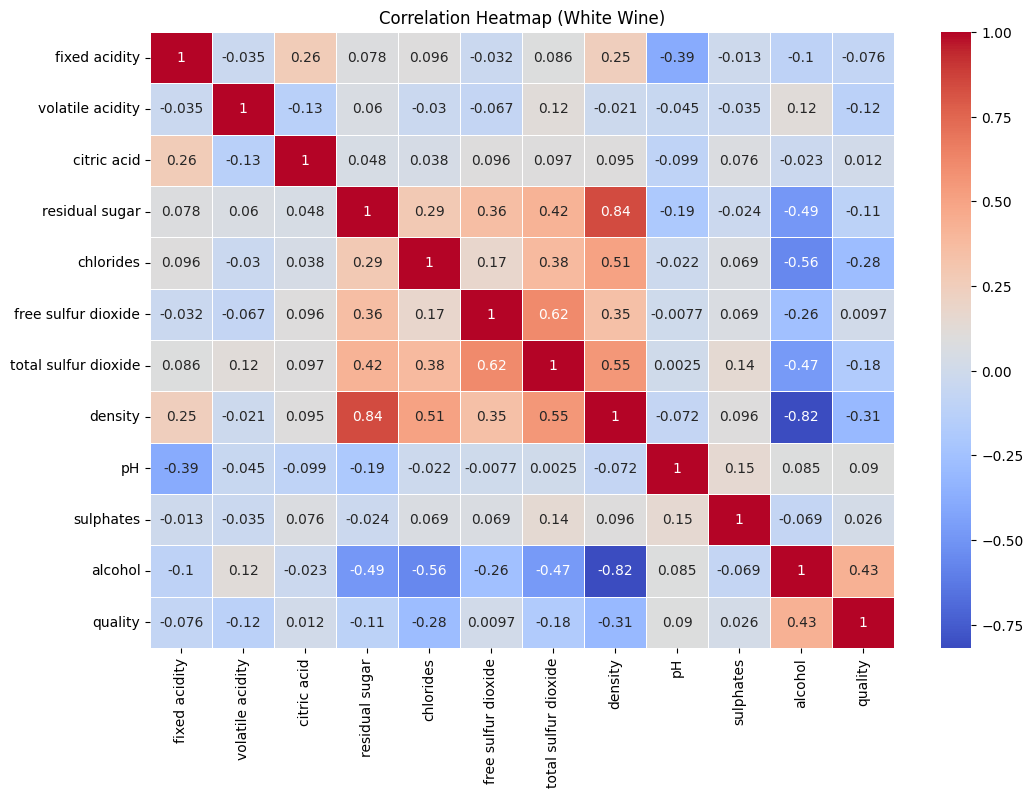

In [79]:
# Calculate the correlation matrix for the white wine data frame
white_wine_corr = whitedata.corr()

# Create a heatmap to visualize correlations
plt.figure(figsize=(12, 8))
sns.heatmap(white_wine_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap (White Wine)')
plt.show()


## From the above correlation plot for the given dataset for wine quality prediction, we can easily see which items are related strongly with each other and which items are related weekly with each other.

### Model Building for red wine

In [80]:
X1 = reddata.drop(['quality'],axis=1)
y1 = reddata['quality']

In [81]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X1,y1,random_state=42)

In [82]:
from sklearn.linear_model import LinearRegression , ElasticNet , Lasso , Ridge
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor
from sklearn.kernel_ridge import KernelRidge

In [83]:
# Initialize and fit the Linear Regression model
model = LinearRegression()
model.fit(X1, y1)

# Get feature coefficients
feature_coefficients = pd.DataFrame({'Feature': X1.columns, 'Coefficient': model.coef_})

# Display feature importance (coefficients)
print("Feature Importance (Coefficients):")
print(feature_coefficients)


Feature Importance (Coefficients):
                 Feature  Coefficient
0          fixed acidity     0.028499
1       volatile acidity    -0.770109
2            citric acid    -0.275368
3         residual sugar    -0.011317
4              chlorides    -0.697788
5    free sulfur dioxide     0.003752
6   total sulfur dioxide    -0.002348
7                density   -28.293816
8                     pH    -0.421280
9              sulphates     1.700125
10               alcohol     0.257789


In [84]:
kernel = KernelRidge()
lgbm= LGBMRegressor()
random = RandomForestRegressor()
linear = LinearRegression()
elastic = ElasticNet()
lasso  = Lasso()
ridge = Ridge()
svr=SVR()
grad = GradientBoostingRegressor()
sgd = SGDRegressor()
bay = BayesianRidge()
clf = [linear,elastic,lasso,ridge,svr,grad,sgd,bay,random,kernel,lgbm]
matrix1={}

In [85]:
from sklearn.metrics import mean_squared_error
def errorcomputation(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    train_acc= model.score(X_train, y_train)
    test_acc= model.score(X_test, y_test)
    r2=r2_score(y_test,y_pred)
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    matrix1[str(model)]=(r2,rmse,train_acc, test_acc)


In [86]:
for i in clf:
    errorcomputation(i)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000136 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 852
[LightGBM] [Info] Number of data points in the train set: 901, number of used features: 11
[LightGBM] [Info] Start training from score 5.612653


In [87]:
score=pd.DataFrame(matrix1)
score = score.transpose()
score.columns=['R2_score','RMSE', 'Training_Accuracy', 'Test_Accuracy']
score = score.sort_values('R2_score',ascending=True)

In [88]:
score

,R2_score,RMSE,Training_Accuracy,Test_Accuracy
SGDRegressor(),-1.523836e+23,2.827158e+11,-1.539653e+23,-1.523836e+23
Lasso(),2.409417e-02,7.154591e-01,2.545933e-02,2.409417e-02
ElasticNet(),3.715752e-02,7.106545e-01,4.110607e-02,3.715752e-02
SVR(),1.885648e-01,6.523907e-01,1.750009e-01,1.885648e-01
LinearRegression(),3.893367e-01,5.659548e-01,3.509850e-01,3.893367e-01
BayesianRidge(),3.954326e-01,5.631229e-01,3.487984e-01,3.954326e-01
Ridge(),3.961813e-01,5.627742e-01,3.484582e-01,3.961813e-01
KernelRidge(),3.996941e-01,5.611347e-01,3.378636e-01,3.996941e-01
LGBMRegressor(),4.016729e-01,5.602092e-01,9.468687e-01,4.016729e-01
GradientBoostingRegressor(),4.034276e-01,5.593871e-01,6.503755e-01,4.034276e-01


### Model Building for white wine 

In [89]:
X2 = whitedata.drop(['quality'],axis=1)
y2 = whitedata['quality']

In [90]:
X1_train,X1_test,y1_train,y1_test = train_test_split(X2,y2,random_state=42)

In [91]:
from sklearn.metrics import mean_squared_error
def errorcomputation(model):
    model.fit(X1_train,y1_train)
    y1_pred = model.predict(X1_test)
    r2=r2_score(y1_test,y1_pred)
    train_acc= model.score(X1_train, y1_train)
    test_acc= model.score(X1_test, y1_test)
    rmse=np.sqrt(mean_squared_error(y1_test,y1_pred))
    matrix1[str(model)]=(r2,rmse, train_acc, test_acc)

In [92]:
for i in clf:
    errorcomputation(i)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000186 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1144
[LightGBM] [Info] Number of data points in the train set: 3125, number of used features: 11
[LightGBM] [Info] Start training from score 5.951360


In [93]:
score=pd.DataFrame(matrix1)
score = score.transpose()
score.columns=['R2_score','RMSE', 'Taining Accuracy', 'Testing Accuracy']
score = score.sort_values('R2_score',ascending=True)

In [94]:
score

,R2_score,RMSE,Taining Accuracy,Testing Accuracy
SGDRegressor(),-5.725739e+24,2.015881e+12,-5.684564e+24,-5.725739e+24
Lasso(),4.086759e-02,8.250653e-01,3.599490e-02,4.086759e-02
ElasticNet(),5.331492e-02,8.196941e-01,4.752944e-02,5.331492e-02
SVR(),1.063798e-01,7.963895e-01,1.095691e-01,1.063798e-01
BayesianRidge(),2.455575e-01,7.317490e-01,2.491542e-01,2.455575e-01
Ridge(),2.455598e-01,7.317479e-01,2.491647e-01,2.455598e-01
KernelRidge(),2.459174e-01,7.315744e-01,2.488135e-01,2.459174e-01
LinearRegression(),2.556944e-01,7.268164e-01,2.602418e-01,2.556944e-01
GradientBoostingRegressor(),3.924446e-01,6.566622e-01,5.047266e-01,3.924446e-01
LGBMRegressor(),4.709754e-01,6.127552e-01,7.890381e-01,4.709754e-01


##### Random Forest Regressor performs the best in our case.